In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib widget

Basic
    Optimization

In [50]:
def f(x):
    return (x-3)**2
sp.optimize.minimize(f,2)

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [51]:
sp.optimize.minimize(f,2).x

array([2.99999999])

In [52]:
sp.optimize.minimize(f,2).fun

5.551437397369767e-17

In [100]:
sp.optimize.minimize?

Signature:
sp.optimize.minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(

# $$ f(x,y) = (x-1)^2 + (y-2.5)^2 $$
$$ x - 2y + 2 \geq 0 \\
    -x - 2y + 6 \geq 0 \\
    -x + 2y + 2 \geq 0 \\
    x \geq 0 \\
    y \geq 0$$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
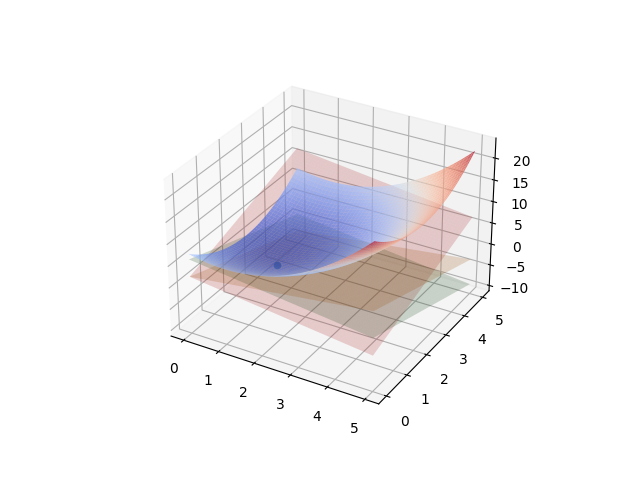

In [111]:
def f(x,y):
    return (x-1)**2 + (y-2.5)**2
def g(x,y):
    return x - 2*y + 2

def h(x,y):
    return -x - 2*y + 6
def k(x,y):
    return -x + 2*y +2

x = np.linspace(0,5,100)
x,y = np.meshgrid(x,x)
z = f(x,y)
g = g(x,y)
h = h(x,y)
k = k(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x,y,z,cmap='coolwarm',alpha=0.7)
ax.plot_surface(x,y,g,alpha=0.2)
ax.plot_surface(x,y,h,alpha=0.2)
ax.plot_surface(x,y,k,alpha=0.2)

#ax.scatter3D(x,y,z, c=z,cmap='coolwarm')

#############################
#### optimize.minimize ######
#############################
# constraints
# ineq = inequlity
# bounds
l = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type':'ineq','fun':lambda x: x[0] - 2*x[1] + 2},
       {'type':'ineq','fun':lambda x: -x[0] - 2*x[1] + 6},
       {'type':'ineq','fun':lambda x: -x[0] + 2*x[1] + 2})
bnds = ((0,None),(0,None))
res = sp.optimize.minimize(l,(2,0), bounds=bnds, constraints=cons)
z3 = f(res.x[0], res.x[1])
###############################


ax.scatter3D([res.x[0]],[res.x[1]],[f(res.x[0],res.x[1])])


# interpolate

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
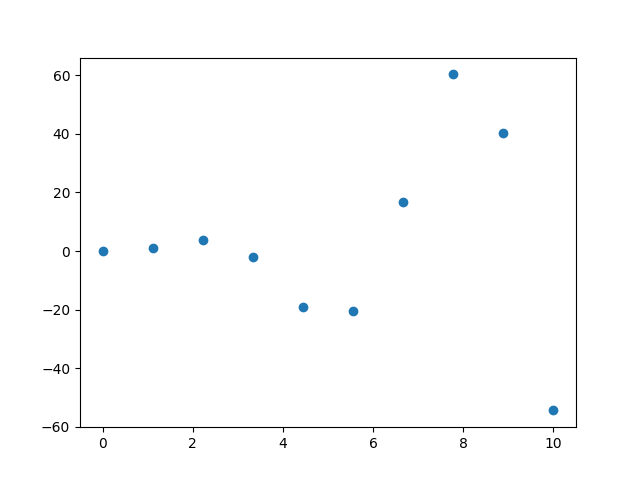

In [115]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(x,y)

In [119]:
f = sp.interpolate.interp1d(x,y,kind='linear')
f = sp.interpolate.interp1d(x,y,kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
ax.plot(x_dense,y_dense)

# Curve Fitting

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
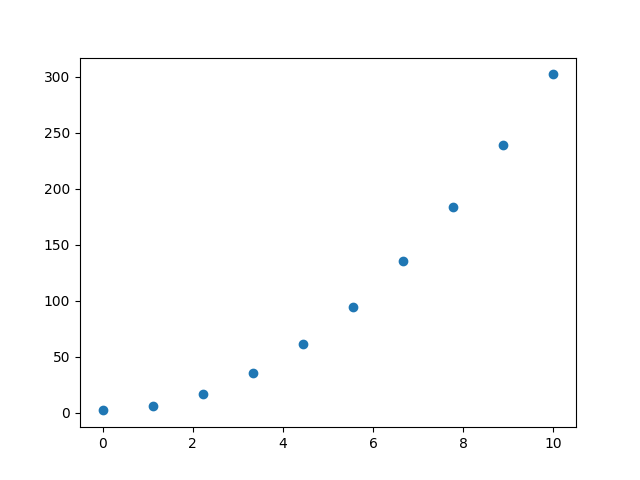

In [122]:
x = np.linspace(0,10,10)
y = 3*x**2 +2
fig = plt.figure()
ax=fig.add_subplot()
ax.scatter(x,y)

In [124]:
def f(x,a,b):
    return a*x**2 + b

popt, pcov = sp.optimize.curve_fit(f,x,y,p0=(1,1))
popt

array([3., 2.])

In [117]:
def f(x):
    return x**2 +5
sp.integrate.quad(f,0,1)

(5.333333333333333, 5.921189464667501e-14)

In [26]:
round(quad(f,0,1)[0], 2)

5.33

In [8]:
quad(lambda x: x**2 + 5, 0,1)

(5.333333333333333, 5.921189464667501e-14)

In [14]:
quad(lambda x:np.exp(-x**2)*np.cos(2*np.pi*x), -np.inf, np.inf)

(9.167696056819157e-05, 1.1995124748254555e-09)

In [16]:
n = 1
quad(lambda x, n: np.exp(-n*x**2),0,np.inf,args=n)

(0.8862269254527579, 7.101318390472462e-09)

In [17]:
quad(lambda x, n: np.exp(-n*x**2),0,np.inf,args=n)[0]

0.8862269254527579

In [20]:
integrals = [quad(lambda x, n: np.exp(-n*x**2),0,np.inf,args=n)[0] for n in range(1,10)]
integrals

[0.8862269254527579,
 0.6266570686577508,
 0.5116633539732443,
 0.44311346272637897,
 0.3963327297606012,
 0.3618006272791338,
 0.334962292845339,
 0.31332853432887503,
 0.29540897515091924]